In [1]:
import matplotlib.pyplot as plt
import numpy
from pathlib import Path
import os
import sys
from tqdm import tqdm

repo_path = str(Path().resolve().parent)
os.chdir(repo_path)
sys.path.append(repo_path)

from src.satellite_image_processing.image_handler.general_image_handler import (
    CocagneImageHandler
)
from src.satellite_image_processing.normalize_index import create_ndwi_raster

In [2]:
image_list = list(Path("data/sentinel2_data/cocagne/").iterdir())
image_list_2022 = list(filter(lambda path: "2022" in str(path), image_list))

In [3]:
str(image_list[2])

'data\\sentinel2_data\\cocagne\\S2A_MSIL2A_20220511T152631_N0400_R068_T20TLS_20220511T204715.zip'

In [4]:
ll = CocagneImageHandler(image_list[2])

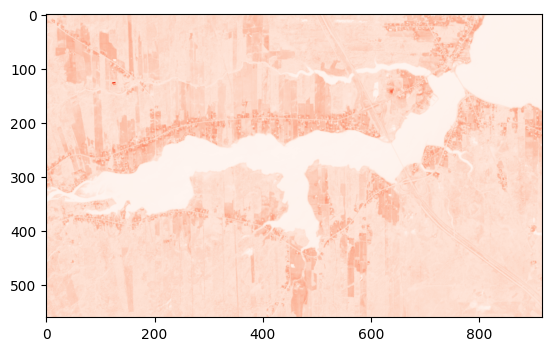

In [5]:
plt.imshow(ll.nir_band, cmap="Reds")

In [6]:
cocagne_image_handler_2022_list = [CocagneImageHandler(image_path) for image_path in tqdm(image_list_2022)]
cocagne_image_handler_2022_list = sorted(cocagne_image_handler_2022_list, key=lambda image_handler: image_handler.date)
COCAGNE_WATER_MASK = create_ndwi_raster(cocagne_image_handler_2022_list[15].green_band, cocagne_image_handler_2022_list[15].nir_band) > 0.01

  0%|          | 0/73 [00:00<?, ?it/s]

100%|██████████| 73/73 [01:02<00:00,  1.17it/s]


In [7]:
cloud_free_images = list(filter(lambda ih: (ih.cloud_prob * COCAGNE_WATER_MASK > 10).mean() < 0.01, cocagne_image_handler_2022_list))

In [8]:
zero_to_ten_pct_clouds = list(filter(lambda ih: 0 < (ih.cloud_prob * COCAGNE_WATER_MASK > 10).mean() < 0.1, cocagne_image_handler_2022_list))

In [9]:
len(cloud_free_images)

30

In [ ]:
for im in cloud_free_images:
    plt.title(f"{im.date}\n{numpy.isin(im.scene_clf * COCAGNE_WATER_MASK, [3, 8, 9, 10]).mean()}")
    plt.imshow(im.true_color_image)
    plt.show()

In [10]:
ih_15 = cocagne_image_handler_2022_list[15]

In [12]:
(ih_15.cloud_prob * COCAGNE_WATER_MASK > 10).sum()

0

In [13]:
smoothed_water_mask = ih_15.get_smoothed_water_mask()

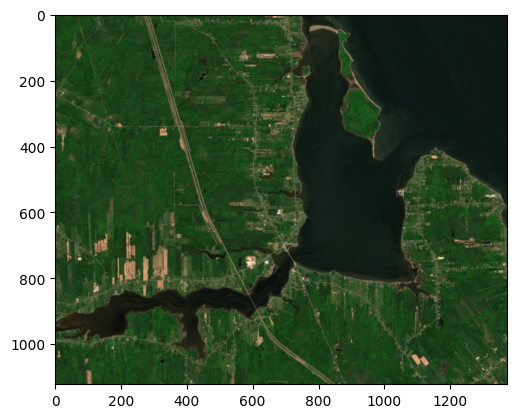

In [14]:
plt.imshow(ih_15.true_color_image)

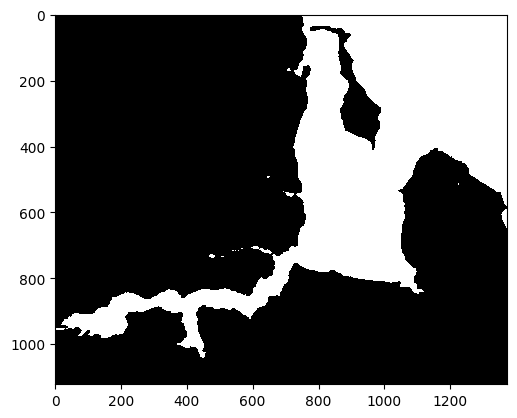

In [15]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(smoothed_water_mask, interpolation="nearest", cmap="Greys_r")
axs[1].imshow(ndwi_water_mask, interpolation="nearest", cmap="Greys_r")

In [89]:
both_water = (smoothed_water_mask == True) & (ndwi_water_mask == True)
both_land = (smoothed_water_mask == False) & (ndwi_water_mask == False)
clf_is_water_and_ndwi_is_land = (smoothed_water_mask == True) & (ndwi_water_mask == False)
clf_is_land_and_ndwi_is_water = (smoothed_water_mask == False) & (ndwi_water_mask == True)

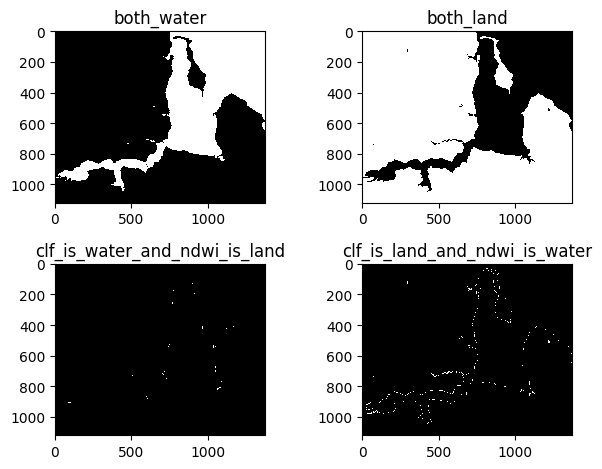

In [90]:
fig, axs = plt.subplots(2,2)
axs[0][0].set_title("both_water")
axs[0][0].imshow(both_water, interpolation="nearest", cmap="Greys_r")

axs[0][1].set_title("both_land")
axs[0][1].imshow(both_land, interpolation="nearest", cmap="Greys_r")

axs[1][0].set_title("clf_is_water_and_ndwi_is_land")
axs[1][0].imshow(clf_is_water_and_ndwi_is_land, interpolation="nearest", cmap="Greys_r")

axs[1][1].set_title("clf_is_land_and_ndwi_is_water")
axs[1][1].imshow(clf_is_land_and_ndwi_is_water, interpolation="nearest", cmap="Greys_r")
plt.tight_layout()
plt.show()

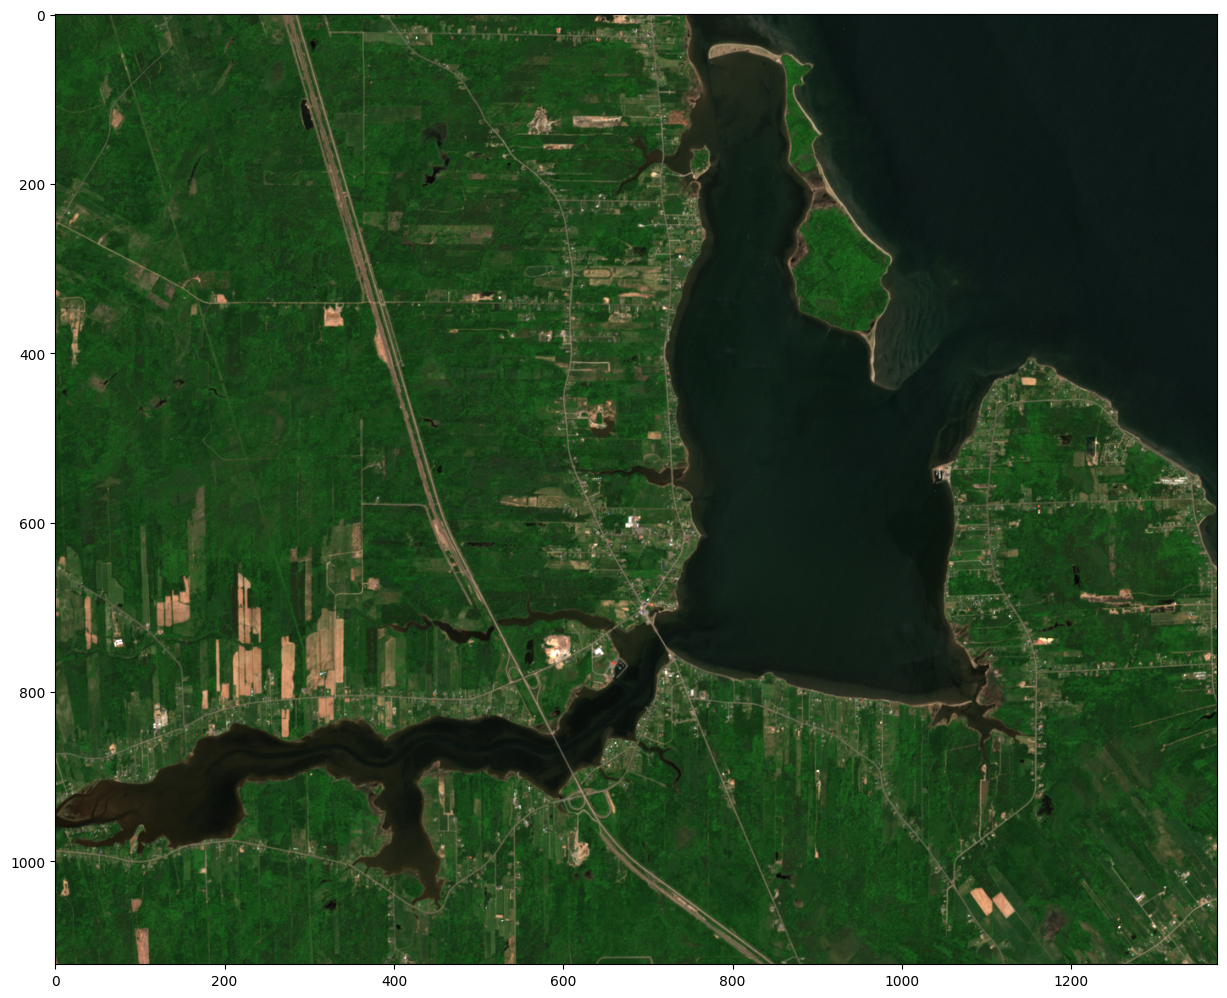

In [29]:
plt.figure(figsize=(15,15))
plt.imshow(ih_15.true_color_image)
#plt.imshow(clf_is_land_and_ndwi_is_water, interpolation="nearest", cmap="Greys_r", alpha=0.5)
plt.show()

In [12]:
from skimage import filters
from skimage.util import img_as_float
from skimage.color import rgb2gray

In [17]:
rgb_float = img_as_float(ih_15.true_color_image)
gray_float = rgb2gray(rgb_float)

In [18]:
edge_roberts = filters.roberts(ih_15.green_band.astype(float))
edge_sobel = filters.sobel(ih_15.green_band.astype(float)/1000)

In [19]:
edge_sobel

array([[0.03297063, 0.07509369, 0.02692582, ..., 0.00403113, 0.00360555,
        0.00403113],
       [0.05345617, 0.0414367 , 0.00906228, ..., 0.00750417, 0.00800391,
        0.00937083],
       [0.0394216 , 0.06939921, 0.06420329, ..., 0.00735272, 0.00625   ,
        0.01322167],
       ...,
       [0.08912526, 0.25528636, 0.32754551, ..., 0.17238221, 0.14564018,
        0.02754201],
       [0.03342996, 0.19209259, 0.32334695, ..., 0.13600827, 0.21224882,
        0.11194753],
       [0.00726722, 0.13424534, 0.26041217, ..., 0.04197991, 0.17716676,
        0.14119579]])

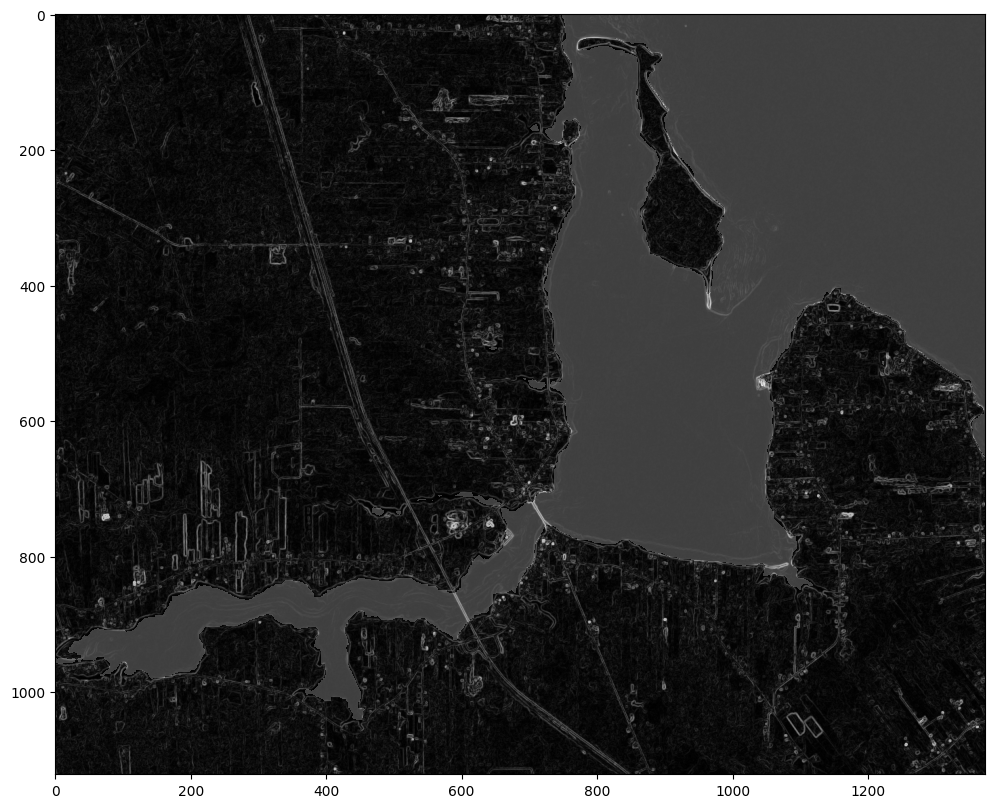

In [20]:
plt.figure(figsize=(12,12))
plt.imshow(numpy.clip(edge_sobel,0,1), cmap="Greys_r")
plt.imshow(smoothed_water_mask, interpolation="nearest", cmap="Greys_r", alpha=0.25)

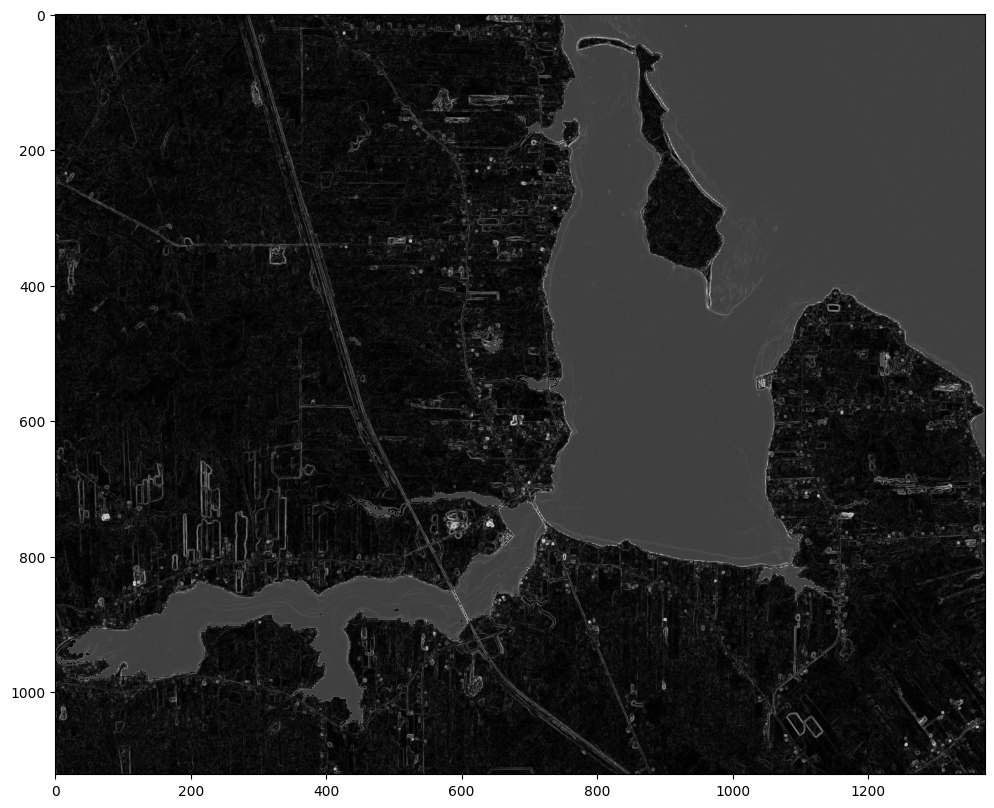

In [96]:
plt.figure(figsize=(12,12))
plt.imshow(numpy.clip(edge_sobel,0,1), cmap="Greys_r")
plt.imshow(ndwi_water_mask, interpolation="nearest", cmap="Greys_r", alpha=0.25)

In [13]:
water_mask = ih_15.get_smoothed_water_mask(sigma=2, threshold=0.75)
edge_sobel = filters.sobel(water_mask)
edge_sobel_mask = edge_sobel>=0.25

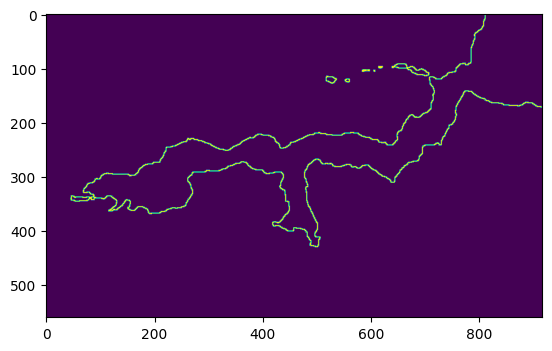

In [14]:
plt.imshow(edge_sobel_mask)

In [15]:
from scipy import ndimage

In [16]:
labeled, num_features = ndimage.label(edge_sobel_mask)
largest_feature = numpy.argmax(numpy.bincount(labeled.ravel())[1:]) + 1

In [17]:
polygon_mask = labeled == largest_feature

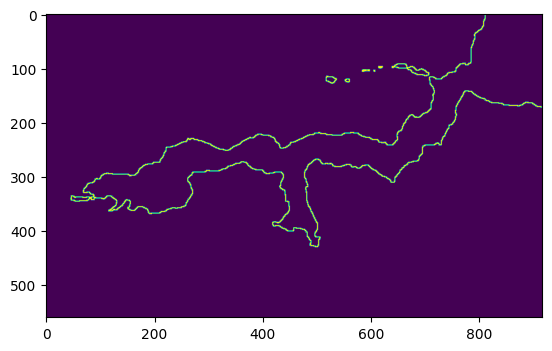

In [18]:
plt.imshow(edge_sobel_mask)

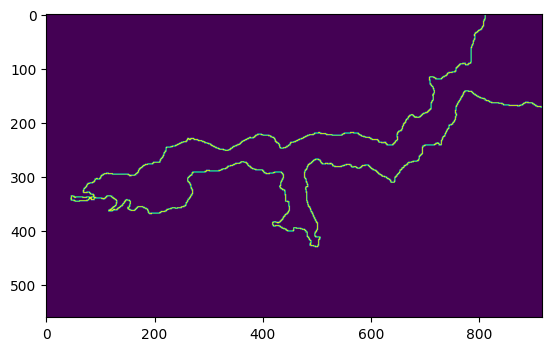

In [19]:
plt.imshow(polygon_mask)

In [33]:
brush_mask = polygon_mask.copy()
brush_radius = 15
for y, x in numpy.argwhere(brush_mask):
    rr, cc = numpy.meshgrid(
            numpy.arange(max(0, y - brush_radius), min(polygon_mask.shape[0], y + brush_radius + 1)),
            numpy.arange(max(0, x - brush_radius), min(polygon_mask.shape[1], x + brush_radius + 1)),
            indexing='ij'
        )
    distance = numpy.sqrt((rr - y)**2 + (cc - x)**2)
    brush_mask[rr[distance <= brush_radius], cc[distance <= brush_radius]] = True


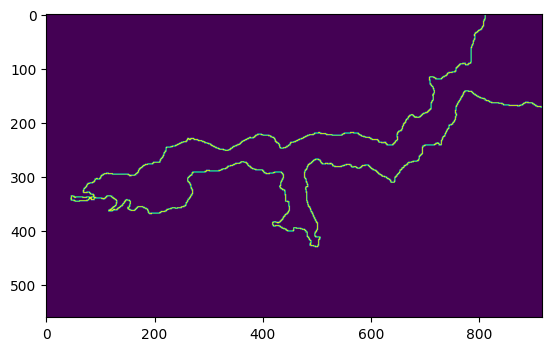

In [51]:
plt.imshow(polygon_mask)

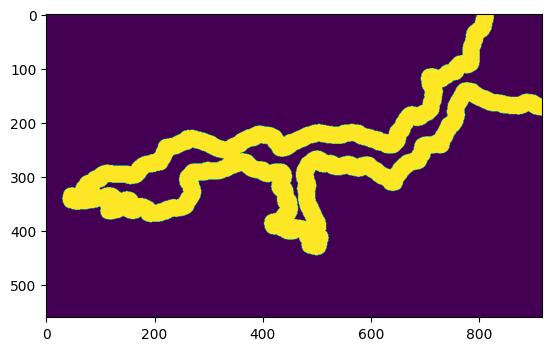

In [35]:
plt.imshow(brush_mask)

In [36]:
inside_polygone_brush_berge = water_mask & brush_mask

In [37]:
channel = ~inside_polygone_brush_berge & water_mask

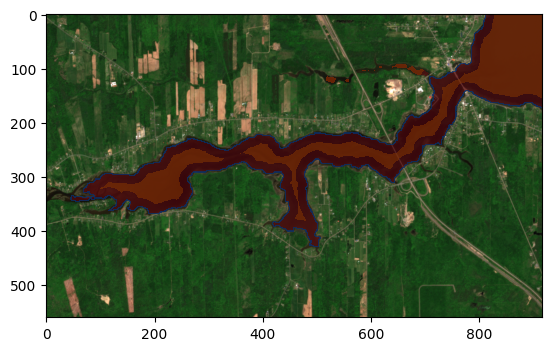

In [54]:
plt.imshow(ih_15.true_color_image)
plt.imshow(inside_polygone_brush_berge, interpolation="nearest", cmap="Reds", alpha=inside_polygone_brush_berge*0.50)
plt.imshow(polygon_mask, interpolation="nearest", cmap="Blues", alpha=polygon_mask*0.75)
plt.imshow(channel, interpolation="nearest", cmap="Oranges", alpha=channel*0.75)
plt.show()

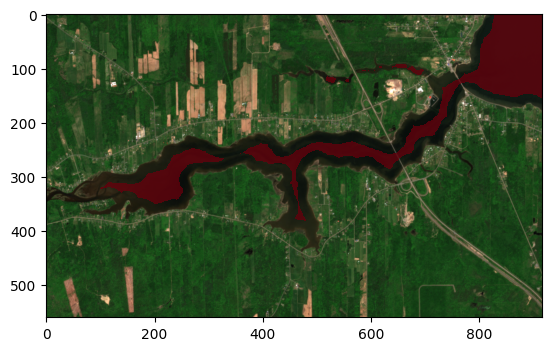

In [53]:
plt.imshow(ih_15.true_color_image)
plt.imshow(channel, interpolation="nearest", cmap="Reds", alpha=channel*0.75)
plt.show()